In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b><ins> Pi Estimation using ratio of number of points falling into a circle inscribed within a square<ins><b>
    
The concept used here is: suppose, number of points falling within inscribed circle is $N_{c}$ and number of points falling within square $N_{s}$
\begin{equation}
    \frac{N_{c}}{N_{s}} = \frac{\pi}{4}
\end{equation}

In [2]:
#Classic method of estimating Pi
def pi_estimation(N):
    M = 0
    for i in range(N):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if x**2 + y**2 <= 1:
            M +=1
    return (4*M)/N

#Generating Pi for different number of simulations
def pi_estimation_comparison(n):
    S = np.random.uniform(1,n**2,n)
    S = [math.trunc(S[i]) for i in range(len(S))]
    pi_estimates = [pi_estimation(S[i]) for i in range(n)]
    return S , pi_estimates

In [3]:
df = pi_estimation_comparison(100)
df = pd.DataFrame(df)
df = df.T
df.columns = ["Number of Simulations", "Estimation of Pi"]
df = df.sort_values(by = ['Number of Simulations'])

In [4]:
math.pi

3.141592653589793

In [5]:
df

,Number of Simulations,Estimation of Pi
4,22.0,3.090909
21,24.0,3.500000
59,68.0,3.294118
31,171.0,3.204678
77,297.0,3.272727
...,...,...
91,9354.0,3.158435
38,9359.0,3.143498
34,9695.0,3.161630
87,9739.0,3.129685


In [6]:
df['Number of Simulations']

4       22.0
21      24.0
59      68.0
31     171.0
77     297.0
       ...  
91    9354.0
38    9359.0
34    9695.0
87    9739.0
81    9903.0
Name: Number of Simulations, Length: 100, dtype: float64

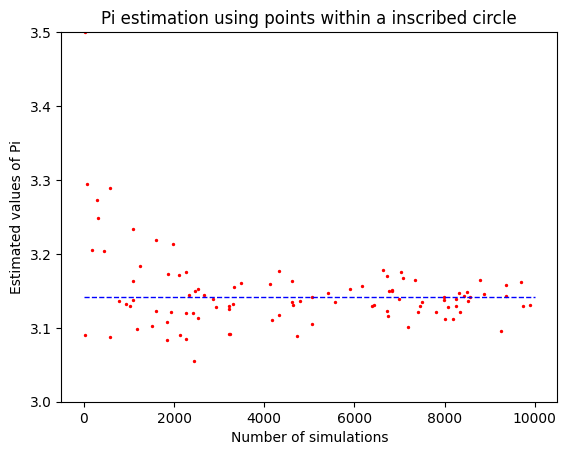

In [7]:
xpoints = df['Number of Simulations']
ypoints = df['Estimation of Pi']
plt.scatter(xpoints, ypoints, s=2, color = 'red')
plt.ylim(3,3.5)
plt.hlines(y=math.pi, xmin = 0, xmax = 10000, colors='blue', linestyles='--', lw=1, label='Mathematical Value of Pi')
plt.title("Pi estimation using points within a inscribed circle")
plt.xlabel("Number of simulations")
plt.ylabel("Estimated values of Pi")
plt.show()

<b> <ins>Pi Estimation using Buffon's Needle Problem<ins> <b>

Now lets move to another way of estimating Pi. Suppose, N needles of length l fell onto a plan with equally spaced parrallel lines. If the distance between two consecutive lines is d and out of N needles only x lie across the lines, then one can show that 
\begin{equation}
    \frac{N}{x} = \frac{1}{\pi}
\end{equation}

In [8]:
#Classic method of estimating Pi using Buffon's Needles
def pi_estimation_buffons_needles(length, distance,N):
    lie_across = 0
    for i in range(N):
        theta = random.uniform(0,90)
        theta_radians = math.radians(theta)
        center_distance = random.uniform(0,distance/2) 
        if center_distance <= (length*math.sin(theta_radians))/2:
            lie_across+=1
    if lie_across == 0:
        return None
    return (2*length*N)/(lie_across*distance)

In [9]:
#Generating Pi for different number of simulations
def pi_estimation_buffons_needles_comparison(length,distance):
    S = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
    pi_estimates = [pi_estimation_buffons_needles(length,distance,S[i]) for i in range(len(S))]
    return S , pi_estimates

In [10]:
pi_estimation_buffons_needles_comparison(1,1)

([10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000],
 [2.857142857142857,
  3.5714285714285716,
  3.4482758620689653,
  2.9940119760479043,
  3.1847133757961785,
  3.1496062992125986,
  3.1357792411414236,
  3.146633102580239,
  3.1444563235016667,
  3.144466211138328,
  3.1437989351953006])

In [11]:
df_buffons = pi_estimation_buffons_needles_comparison(1,1)
df_buffons = pd.DataFrame(df_buffons)
df_buffons = df_buffons.T
df_buffons.columns = ["Number of Simulations", "Estimation of Pi"]
df_buffons = df_buffons.sort_values(by = ['Number of Simulations'])

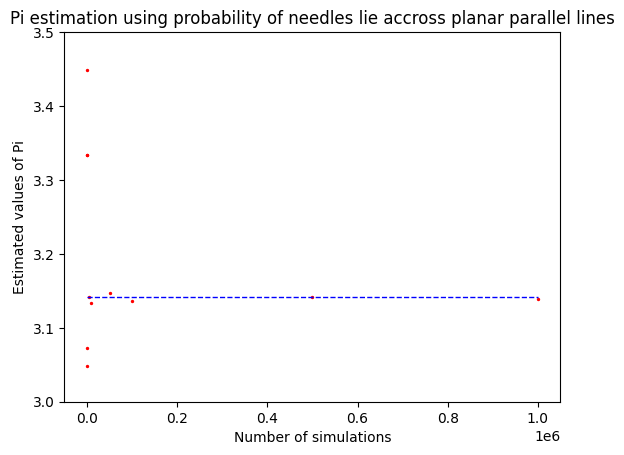

In [12]:
xpoints = df_buffons['Number of Simulations']
ypoints = df_buffons['Estimation of Pi']
plt.scatter(xpoints, ypoints, s=2, color = 'red')
plt.ylim(3,3.5)
plt.hlines(y=math.pi, xmin = 0, xmax = 1000000, colors='blue', linestyles='--', lw=1, label='Mathematical Value of Pi')
plt.title("Pi estimation using probability of needles lie accross planar parallel lines")
plt.xlabel("Number of simulations")
plt.ylabel("Estimated values of Pi")
plt.show()

<b><ins>Pi Estimation using Riemann Zeta Function for s = 2<ins><b>

\begin{equation}
    \sum_{n = 1}^{\infty}\frac{1}{n^{2}} = \frac{\pi^{2}}{6}
\end{equation}

In [13]:
#Estimation of Pi using sum of infinite series
#First method: Riemann Zeta function for s = 2!
def pi_estimation_riemann_zeta2(N):
    riemann_sum = 0
    for i in range(1, N+1):
        riemann_sum = riemann_sum + (1/(i*i))
    return math.sqrt(6*riemann_sum)
#Generating Pi for different number of simulations
def pi_estimation_riemann_zeta2_comparison(N):
    S = np.random.uniform(1,N**2,N)
    S = [math.trunc(S[i]) for i in range(len(S))]
    pi_estimates = [pi_estimation_riemann_zeta2(S[i]) for i in range(len(S))]
    return S , pi_estimates

In [14]:
df_zeta = pi_estimation_riemann_zeta2_comparison(100)
df_zeta = pd.DataFrame(df_zeta)
df_zeta = df_zeta.T
df_zeta.columns = ["Number of Simulations", "Estimation of Pi"]
df_zeta = df_zeta.sort_values(by = ['Number of Simulations'])

In [15]:
df_zeta

,Number of Simulations,Estimation of Pi
75,6.0,2.991376
0,33.0,3.112959
92,73.0,3.128574
24,167.0,3.135886
31,315.0,3.138564
...,...,...
18,9573.0,3.141493
81,9791.0,3.141495
98,9863.0,3.141496
25,9973.0,3.141497


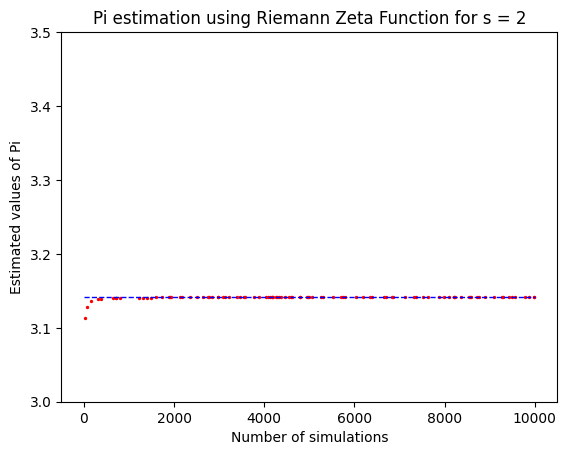

In [16]:
xpoints = df_zeta['Number of Simulations']
ypoints = df_zeta['Estimation of Pi']
plt.scatter(xpoints, ypoints, s=2, color = 'red')
plt.ylim(3,3.5)
plt.hlines(y=math.pi, xmin = 0, xmax = 10000, colors='blue', linestyles='--', lw=1, label='Mathematical Value of Pi')
plt.title("Pi estimation using Riemann Zeta Function for s = 2")
plt.xlabel("Number of simulations")
plt.ylabel("Estimated values of Pi")
plt.show()

<b> <ins>Pi Estimation using Nilakantha series<ins> <b>

Nilakantha series is described as
\begin{equation}
    \pi = 3 + 4\sum_{n = 0}^{\infty}\frac{(-1)^n}{(2n+2)(2n+3)(2n+4)}
\end{equation}

In [17]:
#Second method: Sum upto N numbers using Nilakantha series
def pi_estimation_nilakantha(N):
    nilakantha_sum = 3 #Initialize with 3 as the first term is that in the series
    for i in range(N):
        M = (2*i + 2)*(2*i + 3)*(2*i + 4)
        nilakantha_sum = nilakantha_sum + (4*((-1)**i))/M
    return nilakantha_sum
#Generating Pi for different number of simulations
def pi_estimation_nilakantha_comparison(N):
    S = np.random.uniform(1,N**2,N)
    S = [math.trunc(S[i]) for i in range(len(S))]
    pi_estimates = [pi_estimation_nilakantha(S[i]) for i in range(len(S))]
    return S , pi_estimates

In [18]:
df_nilakantha = pi_estimation_nilakantha_comparison(100)
df_nilakantha = pd.DataFrame(df_nilakantha)
df_nilakantha = df_nilakantha.T
df_nilakantha.columns = ["Number of Simulations", "Estimation of Pi"]
df_nilakantha = df_nilakantha.sort_values(by = ['Number of Simulations'])

In [19]:
df_nilakantha

,Number of Simulations,Estimation of Pi
40,72.0,3.141592
88,90.0,3.141592
64,124.0,3.141593
90,156.0,3.141593
46,305.0,3.141593
...,...,...
8,9472.0,3.141593
43,9753.0,3.141593
61,9776.0,3.141593
77,9793.0,3.141593


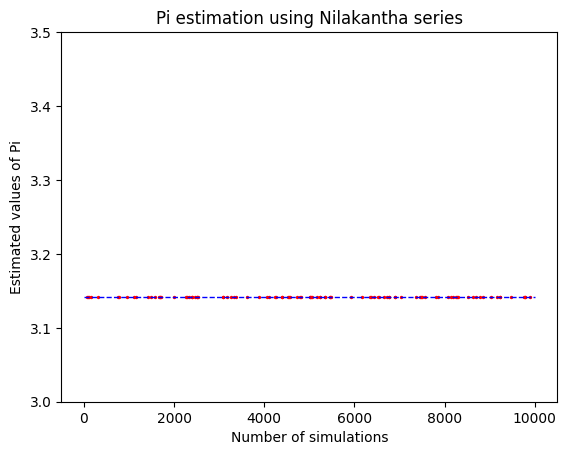

In [20]:
xpoints = df_nilakantha['Number of Simulations']
ypoints = df_nilakantha['Estimation of Pi']
plt.scatter(xpoints, ypoints, s=2, color = 'red')
plt.ylim(3,3.5)
plt.hlines(y=math.pi, xmin = 0, xmax = 10000, colors='blue', linestyles='--', lw=1, label='Mathematical Value of Pi')
plt.title("Pi estimation using Nilakantha series")
plt.xlabel("Number of simulations")
plt.ylabel("Estimated values of Pi")
plt.show()

<b> Concluding Remarks: <b>

Here are a few noticable features in these four simulations-

- The maximum variability among values of Pi is seen in Monte Carlo estimation of Pi using classical method.
- The Nilakantha series converges to mathematical value of Pi faster than other methods
- Among two Monte Carlo estimations, Buffon's needle idea converges to mathematical value of Pi quicker.
- Nilakantha series generates the result of Pi which is close to acutal value within 100 iterations. 